In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data)

In [5]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.columns=['pet_len','pet_wid','sep_len','sep_wid']

In [9]:
df = df.drop(['sep_len','sep_wid'],axis='columns')

In [10]:
import matplotlib.pyplot as plt

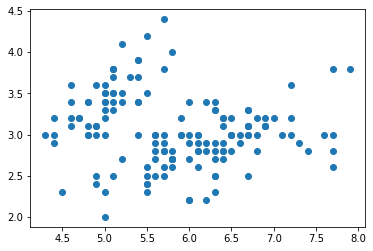

In [11]:
plt.scatter(df.pet_len,df.pet_wid)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler  = MinMaxScaler(feature_range=(0, 1))

In [32]:
scaler.fit(df)

MinMaxScaler()

In [33]:
df = pd.DataFrame(scaler.transform(df))

In [34]:
df.head()

,0,1
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


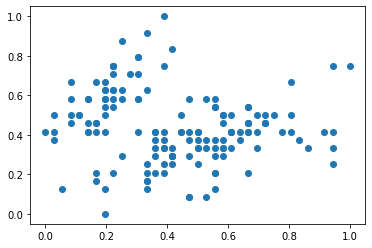

In [35]:
plt.scatter(df[0],df[1])

In [38]:
from sklearn.cluster import KMeans

In [39]:
km = KMeans(n_clusters=3)

In [41]:
df['res']=km.fit_predict(df)

In [42]:
df.head()

,0,1,res
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


In [43]:
df1=df[df.res==0]
df2=df[df.res==1]
df3=df[df.res==2]

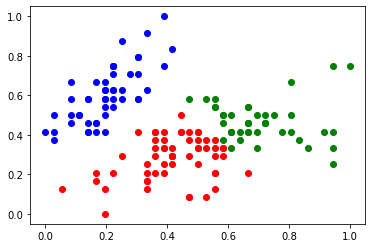

In [47]:
plt.scatter(df1[0],df1[1],color='blue')
plt.scatter(df2[0],df2[1],color='red')
plt.scatter(df3[0],df3[1],color='green')

In [49]:
means = km.cluster_centers_

In [51]:
x = means[:,0]
y = means[:,1]

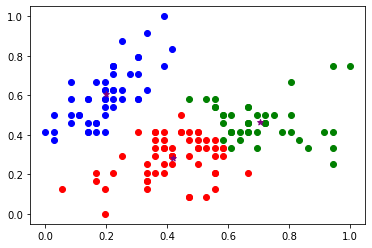

In [56]:
plt.scatter(df1[0],df1[1],color='blue')
plt.scatter(df2[0],df2[1],color='red')
plt.scatter(df3[0],df3[1],color='green')
plt.scatter(x,y,marker='*',color='purple')

In [57]:
sse = []
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  wa

In [58]:
sse

[104.55775720164607,
 31.69225365705505,
 4.127192770522775,
 3.3067133519034755,
 2.624788462861278,
 2.1099156961699936,
 1.819384773958867,
 1.5445439240490826,
 1.3038647362755833]

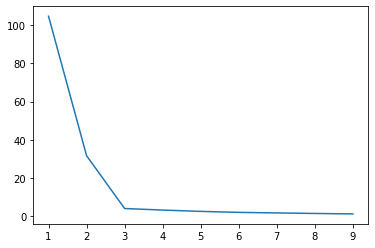

In [59]:
plt.plot(range(1,10),sse)